In [1]:
import json
import pandas as pd

In [19]:
df = pd.read_json("~/arena-hard-vl-70k-sample/post_process_convs.json")
df.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,turn,anony,language,...,image_path,response_a,response_b,text_embeddings,image_embeddings,image_paths,questions,text_embeddings_normalized,image_embeddings_normalized,post_process_conv
0,f63074bdb17c4ae7bb8e47cafee99978,claude-3-opus-20240229,gemini-1.5-pro-api-0514,tie,arena_user_aeZooXE4usngDWwsCqqTSN,"[{'role': 'user', 'content': ['hey', ['845bb83...","[{'role': 'user', 'content': ['hey', ['845bb83...",1,True,English,...,../mnt/disks/data/snapshot/serve_images/845bb8...,The cartoon depicts a group of people at what ...,A giant mosquito is shown socializing with a g...,"[0.16079303620000002, 0.2442789823, 0.25291752...","[0.1179152578, 0.07538867, -0.3528475463000000...",../mnt/disks/data/snapshot/serve_images/845bb8...,hey,"[0.013050730200000001, 0.019826848, 0.02052799...","[0.0107925383, 0.0069001682, -0.03229540220000...",hey\n
1,f17e71fd02c7475599332a2ac7ad6719,gpt-4o-2024-05-13,gemini-1.5-pro-api-0514,model_b,arena_user_dxJ7mZ7guZ32dfbwFdR6wc,"[{'role': 'user', 'content': ['What's happenin...","[{'role': 'user', 'content': ['What's happenin...",1,True,English,...,../mnt/disks/data/snapshot/serve_images/70c553...,This image shows an age verification form from...,This is an age verification form from R.J. Rey...,"[0.21922580900000002, -0.0730775297, 0.1888746...","[0.6526741385, 0.0457536578, 0.158531934, -0.2...",../mnt/disks/data/snapshot/serve_images/70c553...,What's happening here?,"[0.0169480685, -0.005649530900000001, 0.014601...","[0.06595964730000001, 0.0046238926, 0.01602133...",What's happening here?\n
2,b0e521488eb14a10bef2d2082b11f0de,claude-3-opus-20240229,claude-3-haiku-20240307,model_b,arena_user_Eh3GVf5irZNsrX7EwmJWGW,"[{'role': 'user', 'content': ['describe', ['bc...","[{'role': 'user', 'content': ['describe', ['bc...",1,True,English,...,../mnt/disks/data/snapshot/serve_images/bc0e26...,The image shows a user profile page on a websi...,The image shows the user interface of a websit...,"[0.186899364, 0.09820118550000001, 0.242178142...","[-0.11920313540000001, 0.0216540471, 0.0120770...",../mnt/disks/data/snapshot/serve_images/bc0e26...,describe,"[0.0150221728, 0.007892992, 0.0194652450000000...","[-0.0107790391, 0.0019580846, 0.0010920795, 0....",describe\n
3,88a9728b57654052807ac6252c6504a1,claude-3-sonnet-20240229,claude-3-opus-20240229,tie (bothbad),arena_user_2QE84GUzfr7AcMvq2k68Dy,"[{'role': 'user', 'content': ['What can you te...","[{'role': 'user', 'content': ['What can you te...",1,True,English,...,../mnt/disks/data/snapshot/serve_images/d671f3...,This image appears to depict a landscape view ...,"The image shows a black and white, artistic ph...","[0.1078348756, 0.27645325660000003, -0.0612485...","[0.21196255090000002, 0.45955383780000003, -0....",../mnt/disks/data/snapshot/serve_images/d671f3...,What can you tell me about the attached image?,"[0.0085020611, 0.0217964964, -0.004829038, -0....","[0.0179452552, 0.0389069242, -0.01249423500000...",What can you tell me about the attached image?\n
4,227d8ac5d6ca4bcc8dd31df3909f3d7b,claude-3-haiku-20240307,claude-3-sonnet-20240229,model_b,arena_user_2QE84GUzfr7AcMvq2k68Dy,"[{'role': 'user', 'content': ['What can you te...","[{'role': 'user', 'content': ['What can you te...",1,True,English,...,../mnt/disks/data/snapshot/serve_images/d671f3...,The image appears to depict a nighttime landsc...,The image appears to depict a landscape on Jup...,"[0.1078348756, 0.27645325660000003, -0.0612485...","[0.21196255090000002, 0.45955383780000003, -0....",../mnt/disks/data/snapshot/serve_images/d671f3...,What can you tell me about the attached image?,"[0.0085020611, 0.0217964964, -0.004829038, -0....","[0.0179452552, 0.0389069242, -0.01249423500000...",What can you tell me about the attached image?\n


In [20]:
with open("/home/babychou/arena-hard-vl-70k-sample/model_dir/topics.json") as f:
    topics = json.load(f)

cluster_number_to_name = {}
for cluster_number, cluster_obj in topics["topic_aspects"]["OpenAI"].items():
    cluster_number_to_name[cluster_number] = cluster_obj[0][0]
    
cluster_number_to_name

{'-1': 'Image Description Inquiries',
 '0': "Woman's Portrait and Description",
 '1': 'Emotionally Powerful Poetry Creation',
 '2': 'Medieval Castle Location Inquiry',
 '3': 'Video Player User Interface',
 '4': 'Anime Character Image Descriptions',
 '5': 'Floppy Disk Educational Games',
 '6': 'Video Game Screenshot Analysis',
 '7': 'Animal Breed Identification Queries',
 '8': 'Robot Components and Grasping Analysis',
 '9': 'UI Improvements and Code Enhancements',
 '10': 'Image Analysis and Interpretation',
 '11': 'Financial Data Analysis Insights',
 '12': 'Question and Answer Requests',
 '13': 'Painting Interpretation and Analysis',
 '14': 'Identity in Historic Portraits',
 '15': 'Image Prompt Generation Titles',
 '16': '**Data Flow and Model Architecture**',
 '17': 'Image Description and Analysis',
 '18': 'Logo Design and Analysis',
 '19': 'Painting Analysis and Interpretation',
 '20': 'Code Errors and Debugging',
 '21': 'Text Extraction from Handwritten Notes',
 '22': 'Beverage Ident

In [21]:
with open("/home/babychou/arena-hard-vl-70k-sample/conv_topics.json") as f:
    conv_topics = json.load(f)

df['cluster_id'] = conv_topics

In [47]:
import random

random.seed(42)
sampled_conversations = []

category = "arena-hard-vl-random"
for cluster_id in df['cluster_id'].unique():
    n_sample = min(3, df[df['cluster_id'] == cluster_id].shape[0])
    sampled = df[df['cluster_id'] == cluster_id].sample(n=n_sample)

    question_ids = [question_id for question_id in sampled['question_id'].tolist()]
    content = [conv[0]['content'] for conv in sampled['conversation_a'].tolist()]
    cluster_name = cluster_number_to_name[str(cluster_id)]

    for i in range(len(sampled)):
        sampled_conversations.append({
            "question_id": question_ids[i],
            "category": category,
            "cluster_name": cluster_name,
            "turns": [
                {
                    "content": content[i]
                }
            ]
        })


if len(sampled_conversations) < 520:
    """
    Randomly sample 520 conversations from df which have not been sampled yet.
    
    520 because some might not go through gemini.
    """

    sample_num = 520 - len(sampled_conversations)
    sampled = df[~df['conversation_a'].isin(sampled_conversations)]['conversation_a'].sample(n=sample_num)

    question_ids = [question_id for question_id in sampled['question_id'].tolist()]
    content = [conv[0]['content'] for conv in sampled['conversation_a'].tolist()]
    cluster_name = cluster_number_to_name[str(cluster_id)]

    for i in range(len(sampled)):
        sampled_conversations.append({
            "question_id": question_ids[i],
            "category": category,
            "cluster_name": cluster_name,
            "turns": [
                {
                    "content": content[i]
                }
            ]
        })

if len(sampled_conversations) > 520:
    sampled_conversations = random.sample(sampled_conversations, 520)

len(sampled_conversations)

520

In [49]:
for conv in sampled_conversations:
    with open("/home/babychou/arena-hard-vl-70k-sample/bench.jsonl", "a") as f:
        json.dump(conv, f)
        f.write("\n")

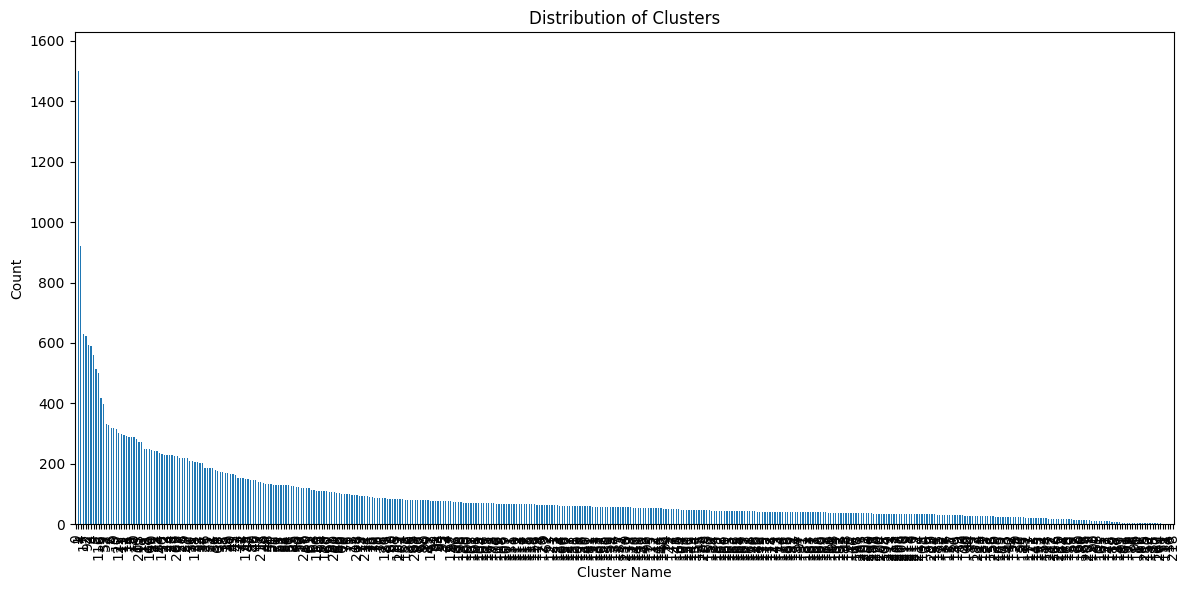

In [15]:
import matplotlib.pyplot as plt

# Get the count of each cluster ID
cluster_counts = df['cluster_id'].value_counts()

# Map cluster numbers to cluster names
# cluster_counts.index = cluster_counts.index.map(lambda x: cluster_number_to_name.get(str(x), x))

# Plot the histogram
plt.figure(figsize=(12, 6))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster Name')
plt.ylabel('Count')
plt.title('Distribution of Clusters')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
df['cluster_id'].value_counts()

cluster_id
0      1551
1      1499
4       921
17      628
2       623
       ... 
51        1
118       1
14        1
36        1
218       1
Name: count, Length: 434, dtype: int64